In [1]:
"""
author: JiaHui (Jeffrey) Lu
id: 25944800
"""
import numpy as np
import matplotlib.pyplot as plt

# a) Construct a mathematical model of the above scenario
Let $S_t$ be the number of susceptible people on the island at time $t$, $I_t$ be the number of infected people on the island at time $t$, and $D_t$ be the number of dead people on the island at time $t$.

$$
\begin{align}
S_{t+1} &= S_t - fS_tI_t \\
I_{t+1} &= I_t + fS_tI_t - dI_t \\
D_{t+1} &= D_t + dI_t \\
\end{align}
$$
where $f$ is the infection rate per uninfected per infected and $d$ is the death rate per infected.

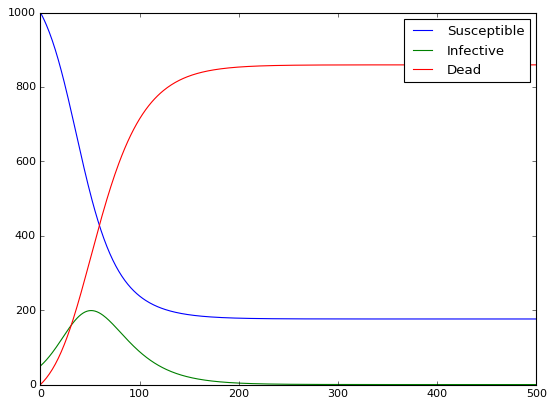

In [81]:
# initialise constants
f = 0.0001  # infective rate
d = 0.05    # death rate
S = [1000]
I = [50]
D = [0]
ts = np.arange(0, 500, 1)
for i in range(len(ts) - 1):
    S.append(S[-1] - f * S[-1] * I[-1])
    I.append(I[-1] + f * S[-1] * I[-1] - d * I[-1])
    D.append(D[-1] + d * I[-1])


fig=plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ts, S, label="Susceptible")
plt.plot(ts, I, label="Infective")
plt.plot(ts, D, label="Dead")
plt.legend()
plt.show()

#d) What are the steady-state solutions of the model?
The steady state occurs when there are no more change to the $S, I, D$

$$
\begin{align}
\Delta S &= S_{t+1}-S_t = - fS_tI_t =0\\
\Delta I &=I_{t+1}-I_t = fS_tI_t - dI_t=0 \\
\Delta D &=D_{t+1}-D_t = dI_t =0\\
\end{align}
$$

Solving the equations above, yields
$$- fS_tI_t =(fS_t - d)I_t=dI_t=0$$
The equation holds when $I_t = 0$ for some $t$ where $t$ is the time when the steady state is achieved.
The non trivial station point is:
$$S_{stationary} = d/f$$

In [82]:
def dX1_dt(X,f,d):
    return np.array([[-f*X[0]*X[1]],
                     f*X[0]*X[1]-d*X[1]])

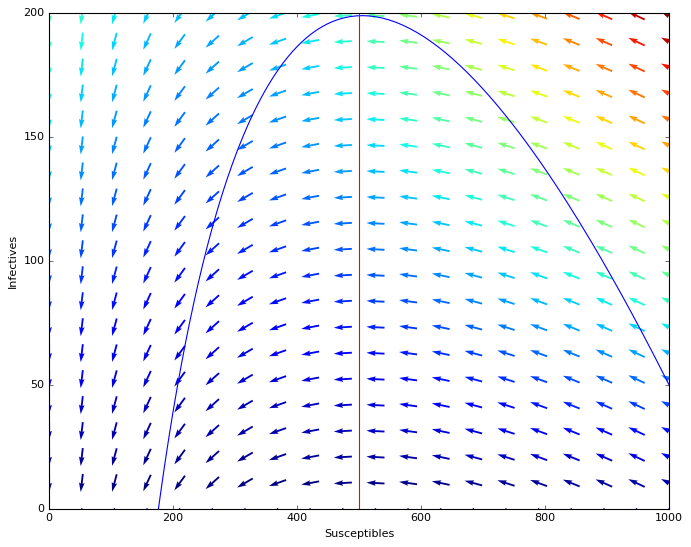

In [83]:
fig=plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(S, I)

step = 20
s = np.linspace(0, np.max(S), step)
i = np.linspace(0, np.max(I), step)
X, Y = np.meshgrid(s, i)
DX1, DY1 = dX1_dt([X, Y], f, d)
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate
M=M.reshape((step,step))
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M
plt.xlabel('Susceptibles')
plt.ylabel('Infectives')
Q = plt.quiver(X, Y, DX1.reshape(step,step), DY1.reshape(step,step), M, pivot='mid', cmap=plt.cm.jet)
plt.axvline(x=d/f, color='r')
plt.show()

# question 5
The new dynamical system has the addition of babies born, which is proportional to the number of uninfected people on the island. Hence the new equation will be as follows:

$$
\begin{align}
S_{t+1} &= S_t +bS_t - fS_tI_t \\
I_{t+1} &= I_t + fS_tI_t - dI_t \\
D_{t+1} &= D_t + dI_t \\
\end{align}
$$

where $f$ is the infection rate per uninfected per infected, $d$ is the death rate per infected and $b$ is the birth rate per uninfected.


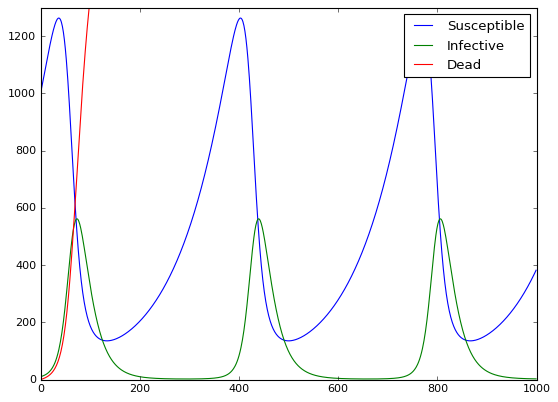

In [48]:
# initialise constants
f = 0.0001  # infective rate
d = 0.05    # death rate
b = 0.01
S = [1000]
I = [10]
D = [0]
ts = np.arange(0, 1000, 1)
for i in range(len(ts) - 1):
    S.append(S[-1] - f * S[-1] * I[-1] + S[-1]*b)
    I.append(I[-1] + f * S[-1] * I[-1] - d * I[-1])
    D.append(D[-1] + d * I[-1])


fig=plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ts, S, label="Susceptible")
plt.plot(ts, I, label="Infective")
plt.plot(ts, D, label="Dead")
plt.ylim((0, 1300))
plt.legend()
plt.show()

In [49]:
def dX_dt(X,b,f,d):
    return np.array([[b*X[0]-f*X[0]*X[1]],
                     f*X[0]*X[1]-d*X[1]])

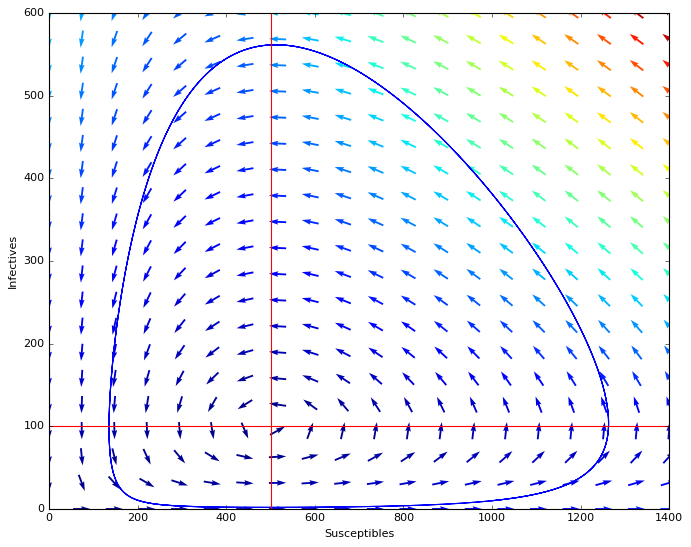

In [62]:
fig=plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(S, I)

step = 20
s = np.linspace(0, 1400, step)
i = np.linspace(0, 600, step)
X, Y = np.meshgrid(s, i)
DX1, DY1 = dX_dt([X, Y], b, f, d)
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate
M=M.reshape((step,step))
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M
plt.xlabel('Susceptibles')
plt.ylabel('Infectives')
Q = plt.quiver(X, Y, DX1.reshape(step,step), DY1.reshape(step,step), M, pivot='mid', cmap=plt.cm.jet)
plt.axvline(x=500, color='r')
plt.axhline(y=100, color='r')
plt.show()

### Find the stationary states
The stationary states can be found by solving $\Delta S = 0$ and $\Delta I = 0$
$$
\begin{align}
\Delta S &=bS - fSI =0 \\
\Delta I &=fSI - dI_t=0 \\
\end{align}
$$

The solutions are:
$$
\begin{align}
S_{stationary} = \frac{d}{f} \\
I_{stationary} = \frac{b}{f}
\end{align}
$$

In the example above, $f = 0.0001, d = 0.05, b = 0.01$:
$$
\begin{align}
S_{stationary} = 500 \\
I_{stationary} = 100
\end{align}
$$

As shown by the horizontal and vertical lines above

In [ ]:
if X > 1:
    Y = 1
else:
    Y=0